In [7]:
import matplotlib.pyplot as plt
# plt.interactive(False)
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]


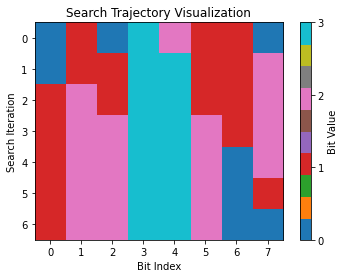

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the search trajectory as a list of positions (each position is an 8-bit list)
search_trajectory = [
    [0, 1, 0, 3, 2, 1, 1, 0],
    [0, 1, 1, 3, 3, 1, 1, 2],
    [1, 2, 1, 3, 3, 1, 1, 2],
    [1, 2, 2, 3, 3, 2, 1, 2],
    [1, 2, 2, 3, 3, 2, 0, 2],
    [1, 2, 2, 3, 3, 2, 0, 1],
    [1, 2, 2, 3, 3, 2, 0, 0]
]

# Convert the search trajectory to a 2D numpy array
trajectory_array = np.array(search_trajectory)

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap plot using the trajectory array
heatmap = ax.imshow(trajectory_array, cmap='tab10', vmin=0, vmax=3)

# Set the ticks and labels for the x-axis (bit index)
ax.set_xticks(np.arange(8))
ax.set_xticklabels(np.arange(8))

# Set the ticks and labels for the y-axis (search iteration)
ax.set_yticks(np.arange(len(search_trajectory)))
ax.set_yticklabels(np.arange(len(search_trajectory)))

# Add colorbar
cbar = fig.colorbar(heatmap, ticks=[0, 1, 2, 3])
cbar.set_label('Bit Value')

# Set the labels and title
ax.set_xlabel('Bit Index')
ax.set_ylabel('Search Iteration')
plt.title('Search Trajectory Visualization')

# Show the plot
plt.show()


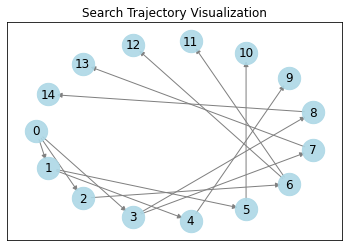

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the search trajectory as a tree-like structure
search_trajectory = {
    '0': ['1', '2', '3'],
    '1': ['4', '5'],
    '2': ['6'],
    '3': ['7', '8'],
    '4': ['9'],
    '5': ['10'],
    '6': ['11', '12'],
    '7': ['13'],
    '8': ['14'],
    '9': [],
    '10': [],
    '11': [],
    '12': [],
    '13': [],
    '14': []
}

# Create a directed graph using networkx
G = nx.DiGraph(search_trajectory)

# Create a figure and axis
fig, ax = plt.subplots()

# Set the layout of the graph (e.g., 'shell', 'spring', 'spectral', 'random', etc.)
pos = nx.shell_layout(G)

# Draw the nodes and edges of the graph
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=500, node_color='lightblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, ax=ax, edge_color='gray', arrows=True)

# Set the labels for the nodes
node_labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, ax=ax, labels=node_labels)

# Set the title
plt.title('Search Trajectory Visualization')

# Show the plot
plt.show()


In [ ]:
import random
import numpy as np
from Landscape import Landscape
from Agent import Agent
np.random.seed(1000)
search_iteration = 500
N = 9
K = 8
state_num = 4
generalist_expertise = 0
specialist_expertise = 20
landscape = Landscape(N=N, K=K, state_num=state_num, alpha=0.5)

# landscape.describe()
agent = Agent(N=N, landscape=landscape, state_num=state_num,
                generalist_expertise=generalist_expertise, specialist_expertise=specialist_expertise)
# agent.describe()
for _ in range(search_iteration):
    agent.search()

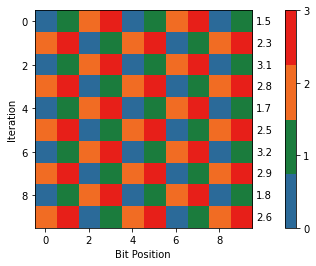

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Define the nested list representing the search trajectory
trajectory = [
    ["0", "1", "2", "3", "0", "1", "2", "3", "0", "1"],
    ["2", "3", "0", "1", "2", "3", "0", "1", "2", "3"],
    ["0", "1", "2", "3", "0", "1", "2", "3", "0", "1"],
    ["2", "3", "0", "1", "2", "3", "0", "1", "2", "3"],
    ["0", "1", "2", "3", "0", "1", "2", "3", "0", "1"],
    ["2", "3", "0", "1", "2", "3", "0", "1", "2", "3"],
    ["0", "1", "2", "3", "0", "1", "2", "3", "0", "1"],
    ["2", "3", "0", "1", "2", "3", "0", "1", "2", "3"],
    ["0", "1", "2", "3", "0", "1", "2", "3", "0", "1"],
    ["2", "3", "0", "1", "2", "3", "0", "1", "2", "3"]
]


# Define the fitness values corresponding to each position
fitness_values = [1.5, 2.3, 3.1, 2.8, 1.7, 2.5, 3.2, 2.9, 1.8, 2.6]

# Convert the strings to integers
trajectory = [[int(bit) for bit in iteration] for iteration in trajectory]

# Create a numpy array from the nested list
trajectory_array = np.array(trajectory)

# Define the colors for the four bit values
# colors = ["blue", "green", "yellow", "red"]
colors = [nature_blue, nature_green, nature_orange, morandi_red]

# Create a colormap based on the defined colors
cmap = plt.cm.colors.ListedColormap(colors)

# Plot the heatmap
plt.imshow(trajectory_array, cmap=cmap)

# # Add colorbar legend
# cbar = plt.colorbar(ticks=[0, 1, 2, 3])
# cbar.set_ticklabels(["0", "1", "2", "3"])

# Define the distinct bit values
bit_values = ["0", "1", "2", "3"]

# Create a categorical colormap based on the distinct bit values
cmap = plt.cm.get_cmap("Set3", len(bit_values))

# Add colorbar legend with categorical labels and adjust the distance from the heatmap
cbar = plt.colorbar(ticks=range(len(bit_values)), pad=0.1)
cbar.set_ticklabels(bit_values)

# Increase the distance between the heatmap and the legend
# plt.subplots_adjust(right=1.2)

# Annotate fitness values on the right side, between the heatmap and the legend
for i, fitness in enumerate(fitness_values):
    plt.annotate(f"{fitness}", xy=(9, i), xytext=(15, 0), textcoords="offset points", ha="left", va="center")

# Set labels for x and y axes
plt.xlabel("Bit Position")
plt.ylabel("Iteration")



plt.savefig("heatmap_performance.png", transparent=True, dpi=300)
plt.show()
